# **Simple Linear Regression**

In [2]:
# Loading libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Reading the file using pandas.**

In [3]:
CreditCard = r'C:\Users\prabu\Git hub Repository\Credit-Card-Income-Prediction-1\CreditCard.csv'
df = pd.read_csv(CreditCard)

**Describing the dataset**

In [4]:
df.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


**Shape**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     1319 non-null   int64  
 1   card         1319 non-null   object 
 2   reports      1319 non-null   int64  
 3   age          1319 non-null   float64
 4   income       1319 non-null   float64
 5   share        1319 non-null   float64
 6   expenditure  1319 non-null   float64
 7   owner        1319 non-null   object 
 8   selfemp      1319 non-null   object 
 9   dependents   1319 non-null   int64  
 10  months       1319 non-null   int64  
 11  majorcards   1319 non-null   int64  
 12  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 134.1+ KB


**I used a seed value based on the last 3 digits of my BU ID to create a data partition, assigning approximately 60% of the records to my training set and the other 40% to my validation (or test) set.**

In [6]:
# Partitioning the dataset into training (60%) and validation (40%) sets:
X = df.drop('income', axis=1)
y = df['income']

# Creating a 60-40 train-test split with random_state = 218 (last 3 digits of my BU ID):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=218, shuffle=False)

# Partition details:
print(f"Training set size: {len(X_train)} rows")
print(f"Validation set size: {len(X_test)} rows")

Training set size: 791 rows
Validation set size: 528 rows


**It important to partition the data before doing any sort of in-depth analysis of
the variables**

***Avoids Overfitting:***

*Partitioning the data ensures that the model does not memorize the training data but learns patterns that generalize well to unseen data.*

***Reliable Performance Assessment:***

*By setting aside a validation set, we can accurately assess how the model performs on new data, providing a trustworthy estimate of real-world performance.*

***Enhances Model Selection:***

*Partitioning allows for fair comparisons between different models or algorithms by evaluating each one on the same, unseen validation set.*

***Prevents Data Snooping Bias:***

*Analyzing the full dataset before partitioning can lead to insights from the test data influencing the model, introducing bias and inflating performance metrics.*

***Supports Robust Feature Engineering:***

*Data partitioning enables more objective feature selection by ensuring that feature engineering decisions are validated on independent data.*

**Exploring the Relationship Between Income and Dependents**

**Creating a scatterplot that depicts income on the y-axis and dependents on the x-axis.**

**Adding a best-fit line to this scatterplot. Using only your training set data to build this plot.**

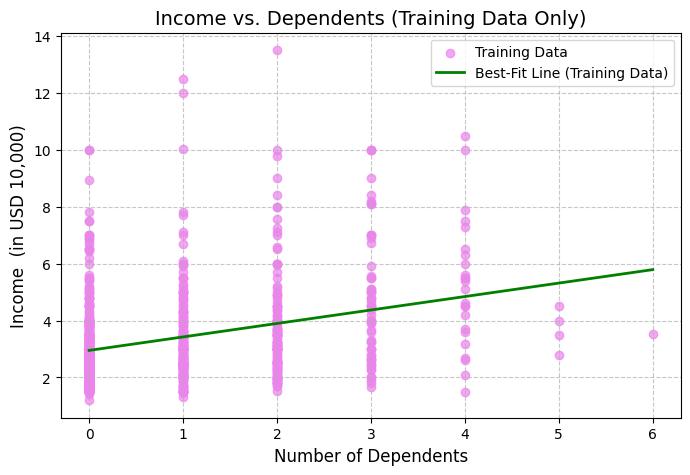

In [7]:
# Separating features and target
X = df[['dependents']]
y = df['income']

# Creating a 60-40 train-test split with random_state = 218 (last 3 digits of my BU ID):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=218,shuffle=False)

# Initializing and training the Linear Regression model on training data only
model = LinearRegression()
model.fit(X_train, y_train)

# Generating predictions for the best-fit line using training data only
x_range = pd.DataFrame(np.linspace(X_train['dependents'].min(), X_train['dependents'].max(), 100), columns=['dependents'])
y_pred_line = model.predict(x_range)

# Creating scatterplot using only the training set
plt.figure(figsize=(8, 5))
plt.scatter(X_train['dependents'], y_train,color='violet', alpha=0.7, label='Training Data')

# Ploting the best-fit line derived from training data
plt.plot(x_range, y_pred_line, color='green', linewidth=2, label='Best-Fit Line (Training Data)')

# Adding title, labels, and legend
plt.title('Income vs. Dependents (Training Data Only)', fontsize=14)
plt.xlabel('Number of Dependents', fontsize=12)
plt.ylabel('Income  (in USD 10,000)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# The plot
plt.show()